In [29]:
from io import StringIO

csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")

df = pd.read_csv(csv_data, dtype={"x1": pd.Int64Dtype()}, parse_dates=[3])
df

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,3.0,2019-01-03,C
3,<NA>,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
5,<NA>,NaN,NaN,2019-01-06,C
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


In [30]:
# sum()을 하면 true값만 합쳐줌
df.isnull().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

In [4]:
%matplotlib inline

<Figure size 432x288 with 0 Axes>

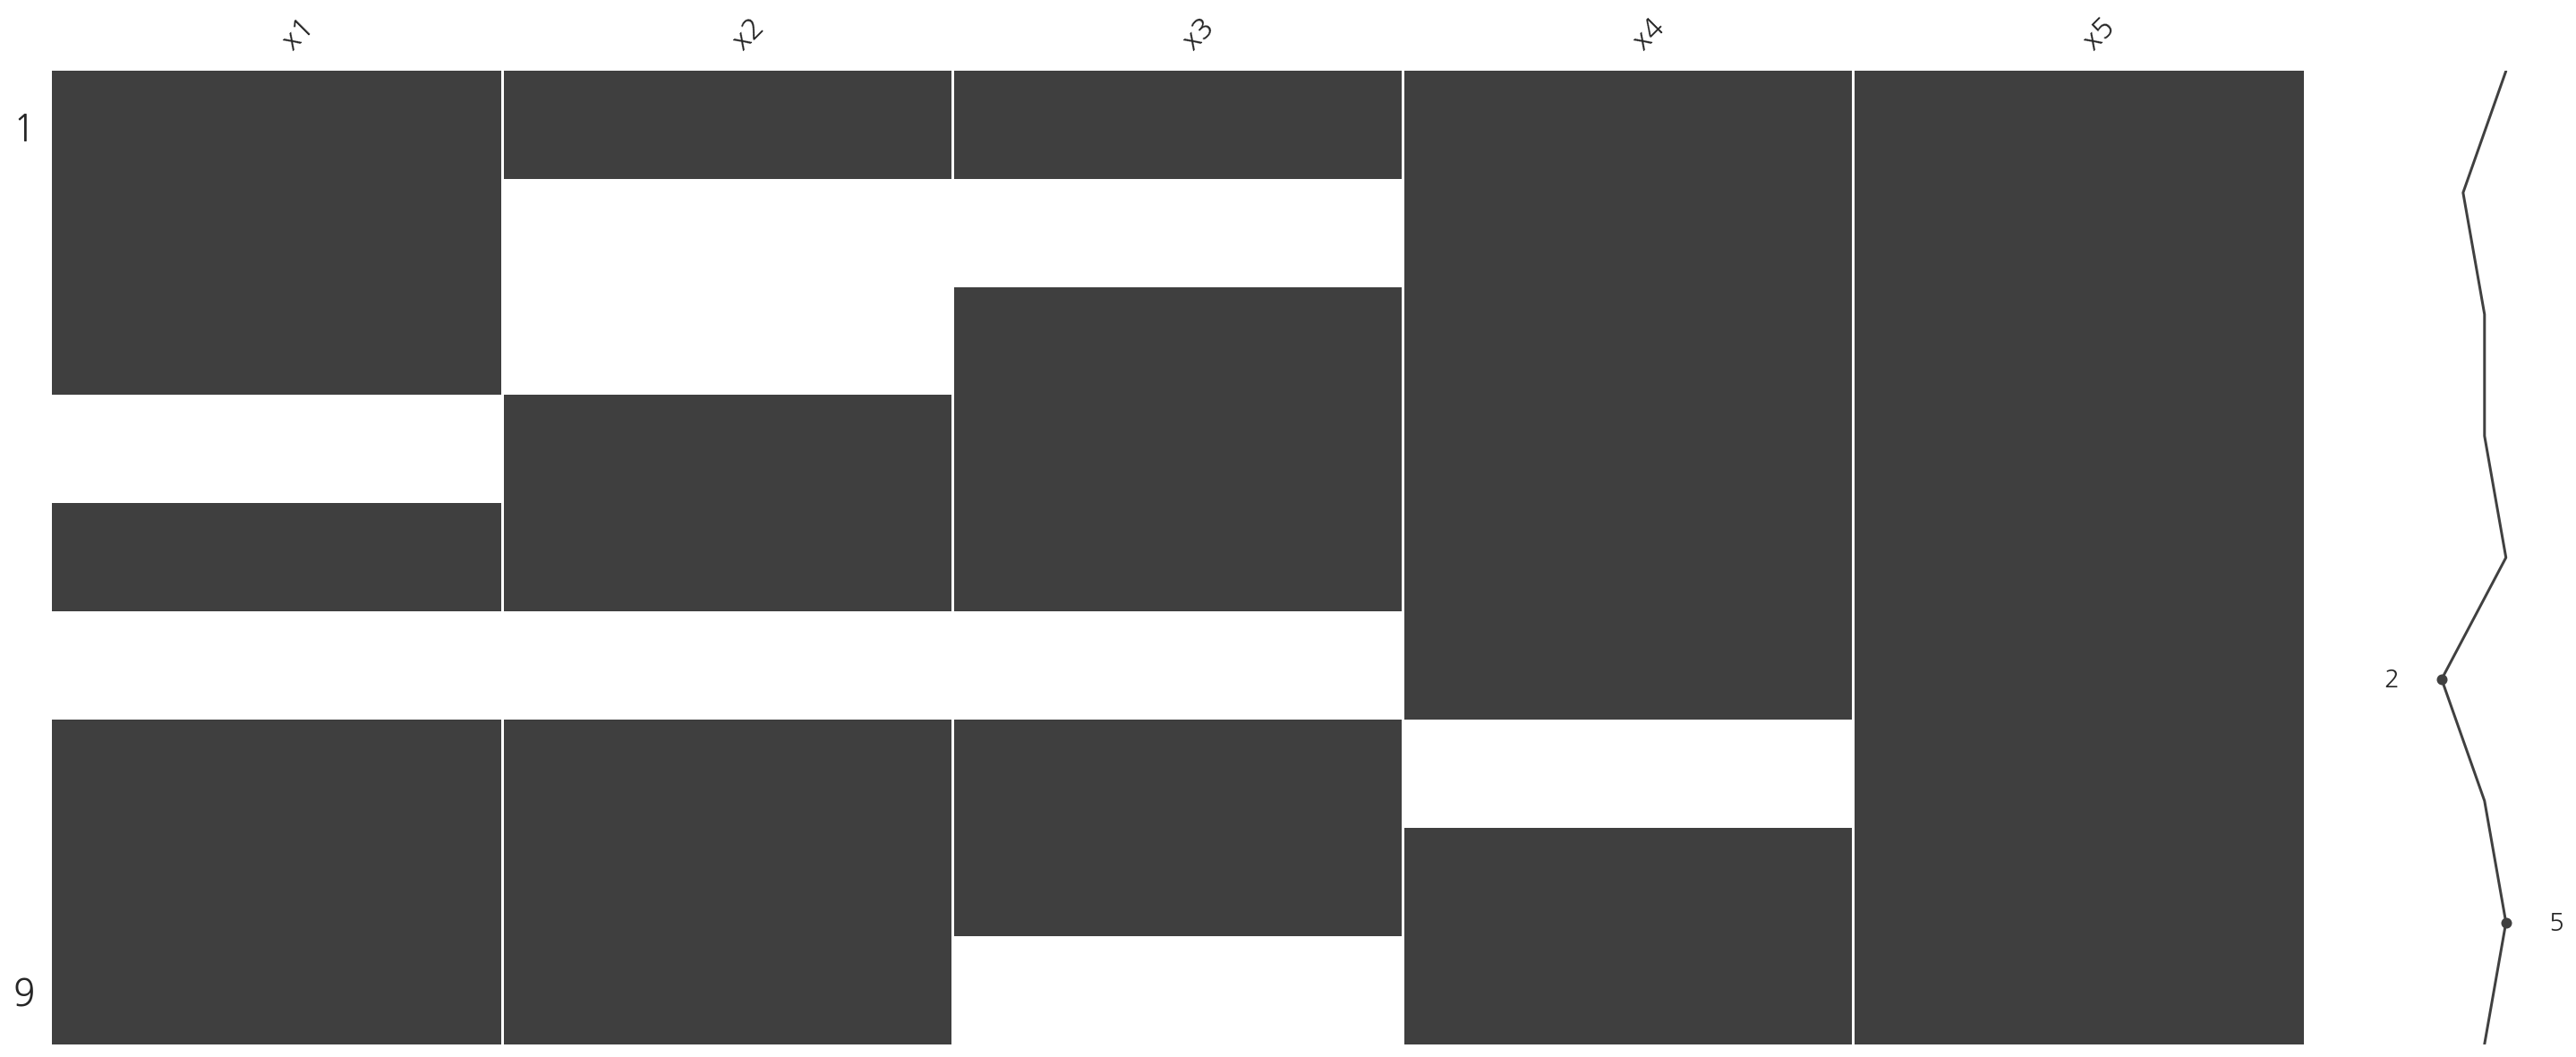

In [6]:
import missingno as msno

plt.figure(facecolor="1.")
msno.matrix(df)
plt.show()

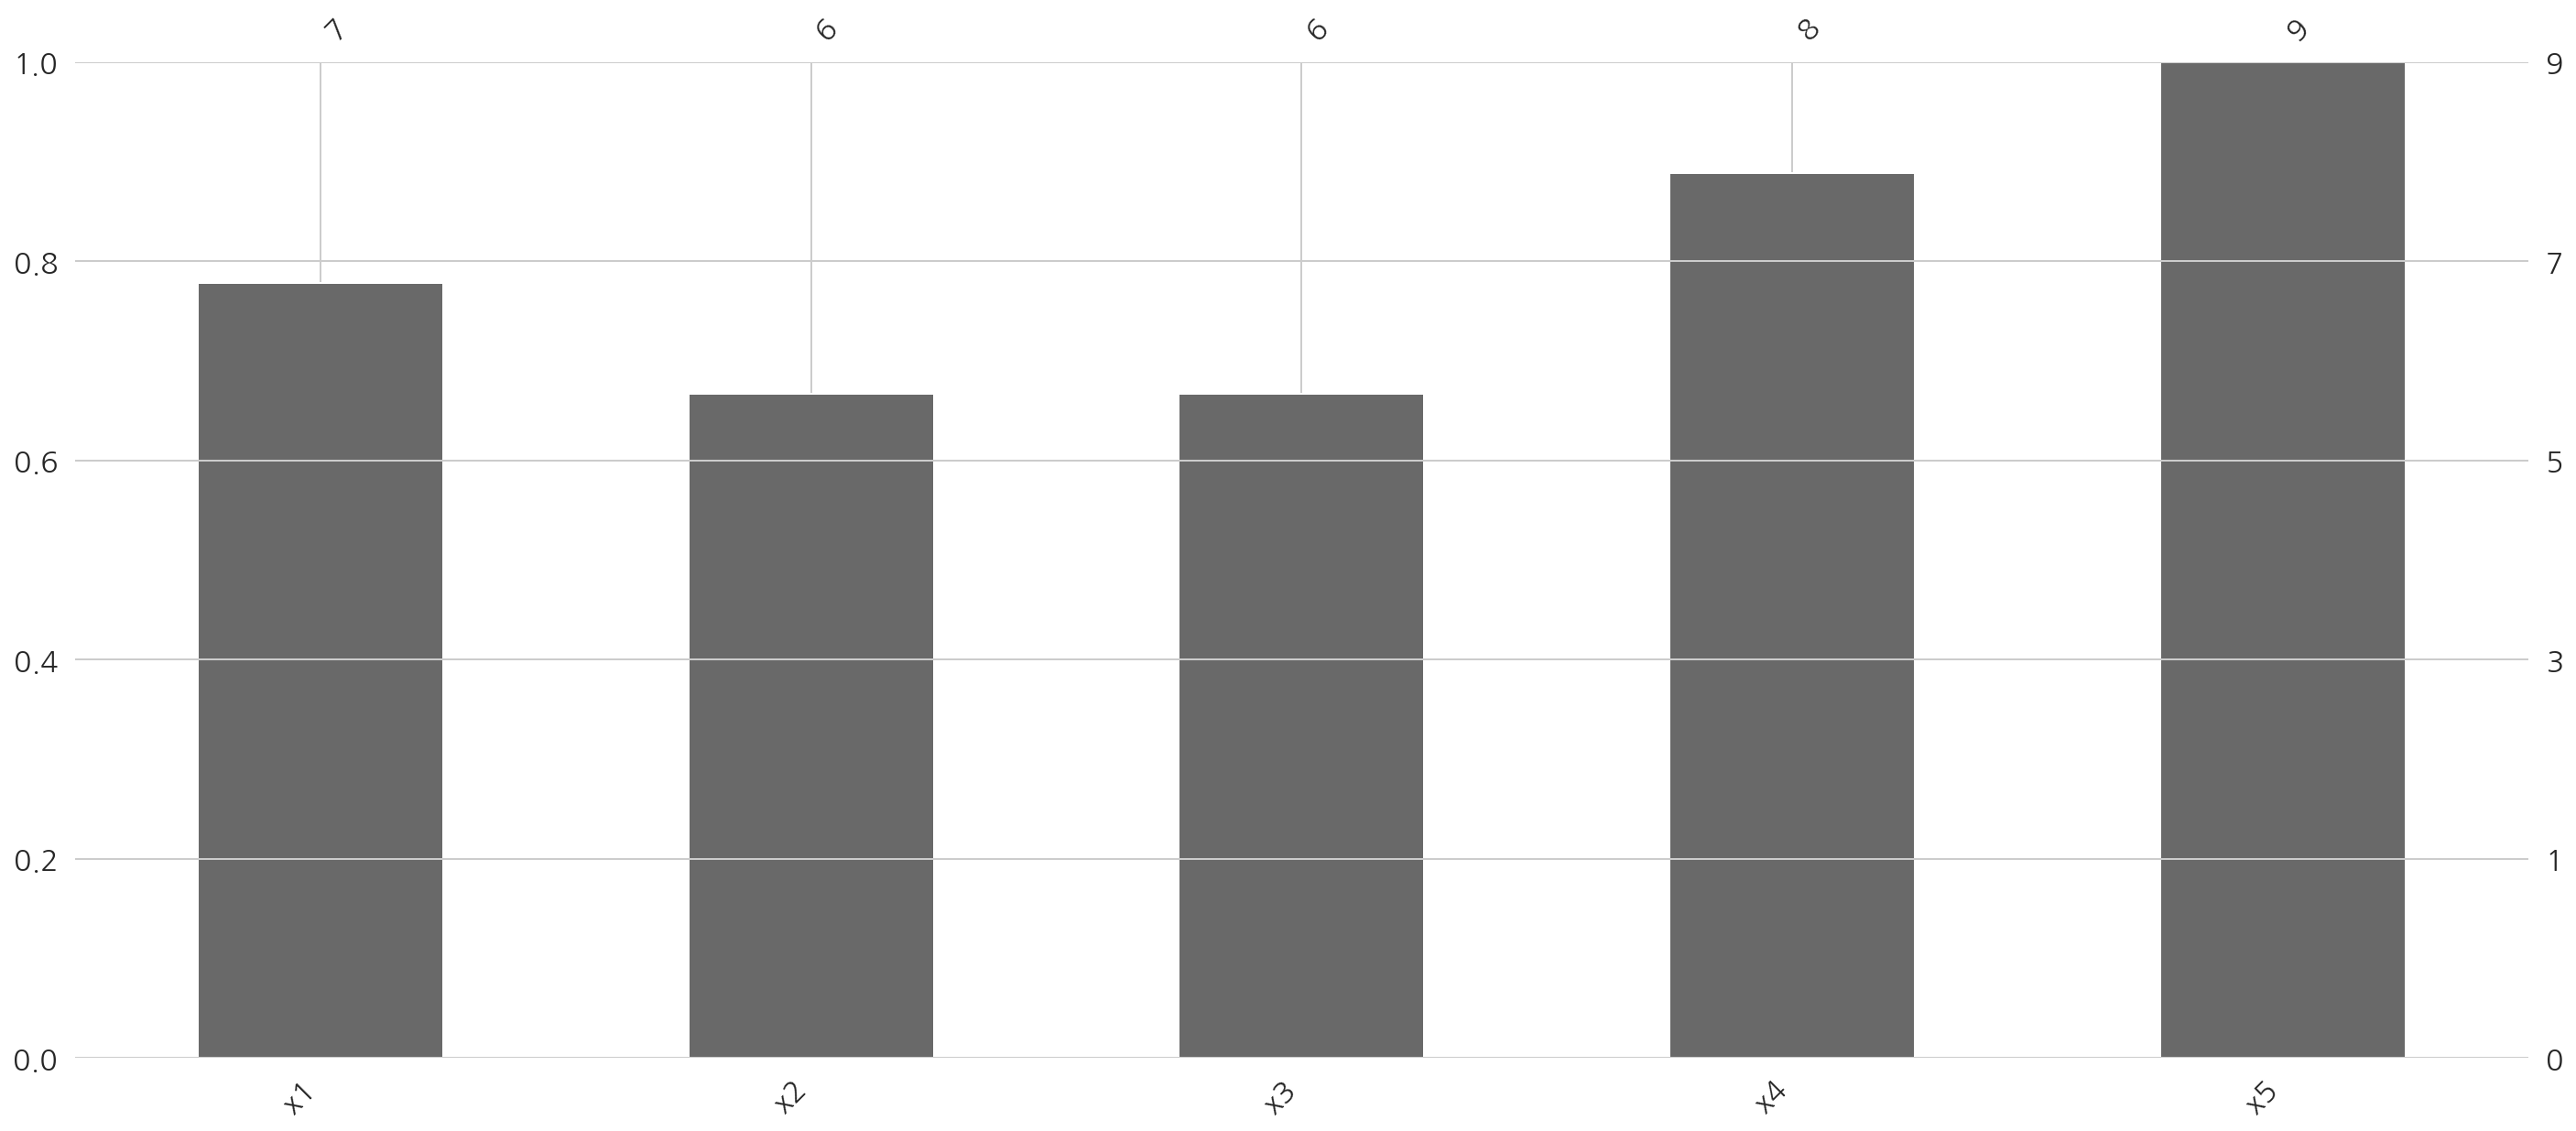

In [8]:
plt.figure(facecolor="1.")
msno.bar(df)
plt.show()

<Figure size 432x288 with 0 Axes>

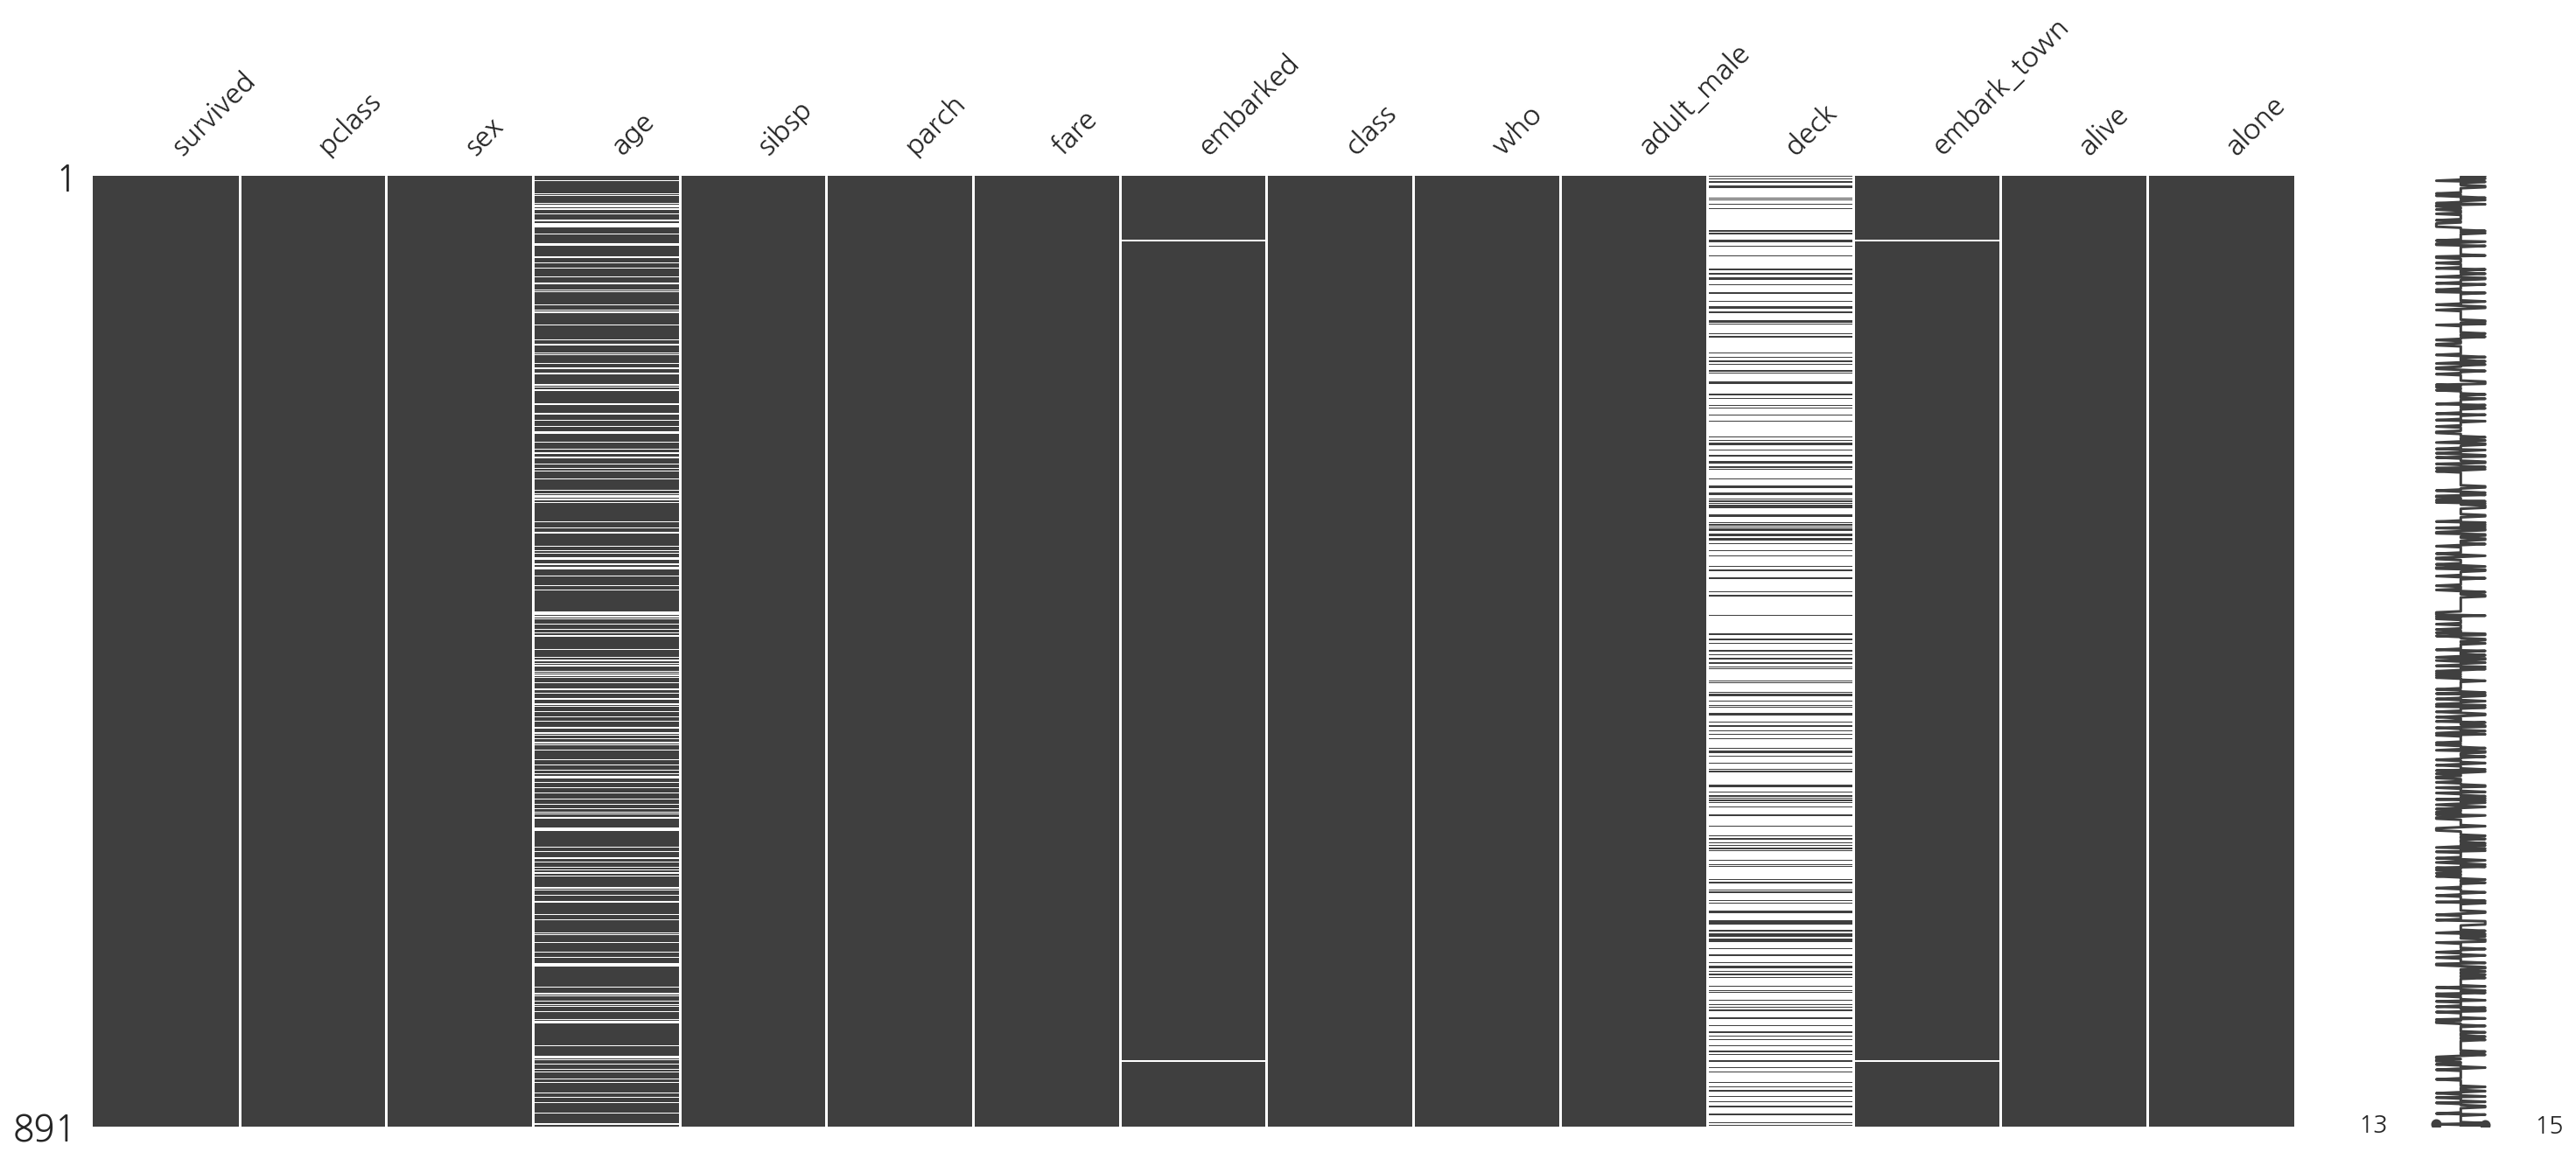

In [9]:
titanic = sns.load_dataset("titanic")
plt.figure(facecolor="1.")
msno.matrix(titanic)
plt.show()

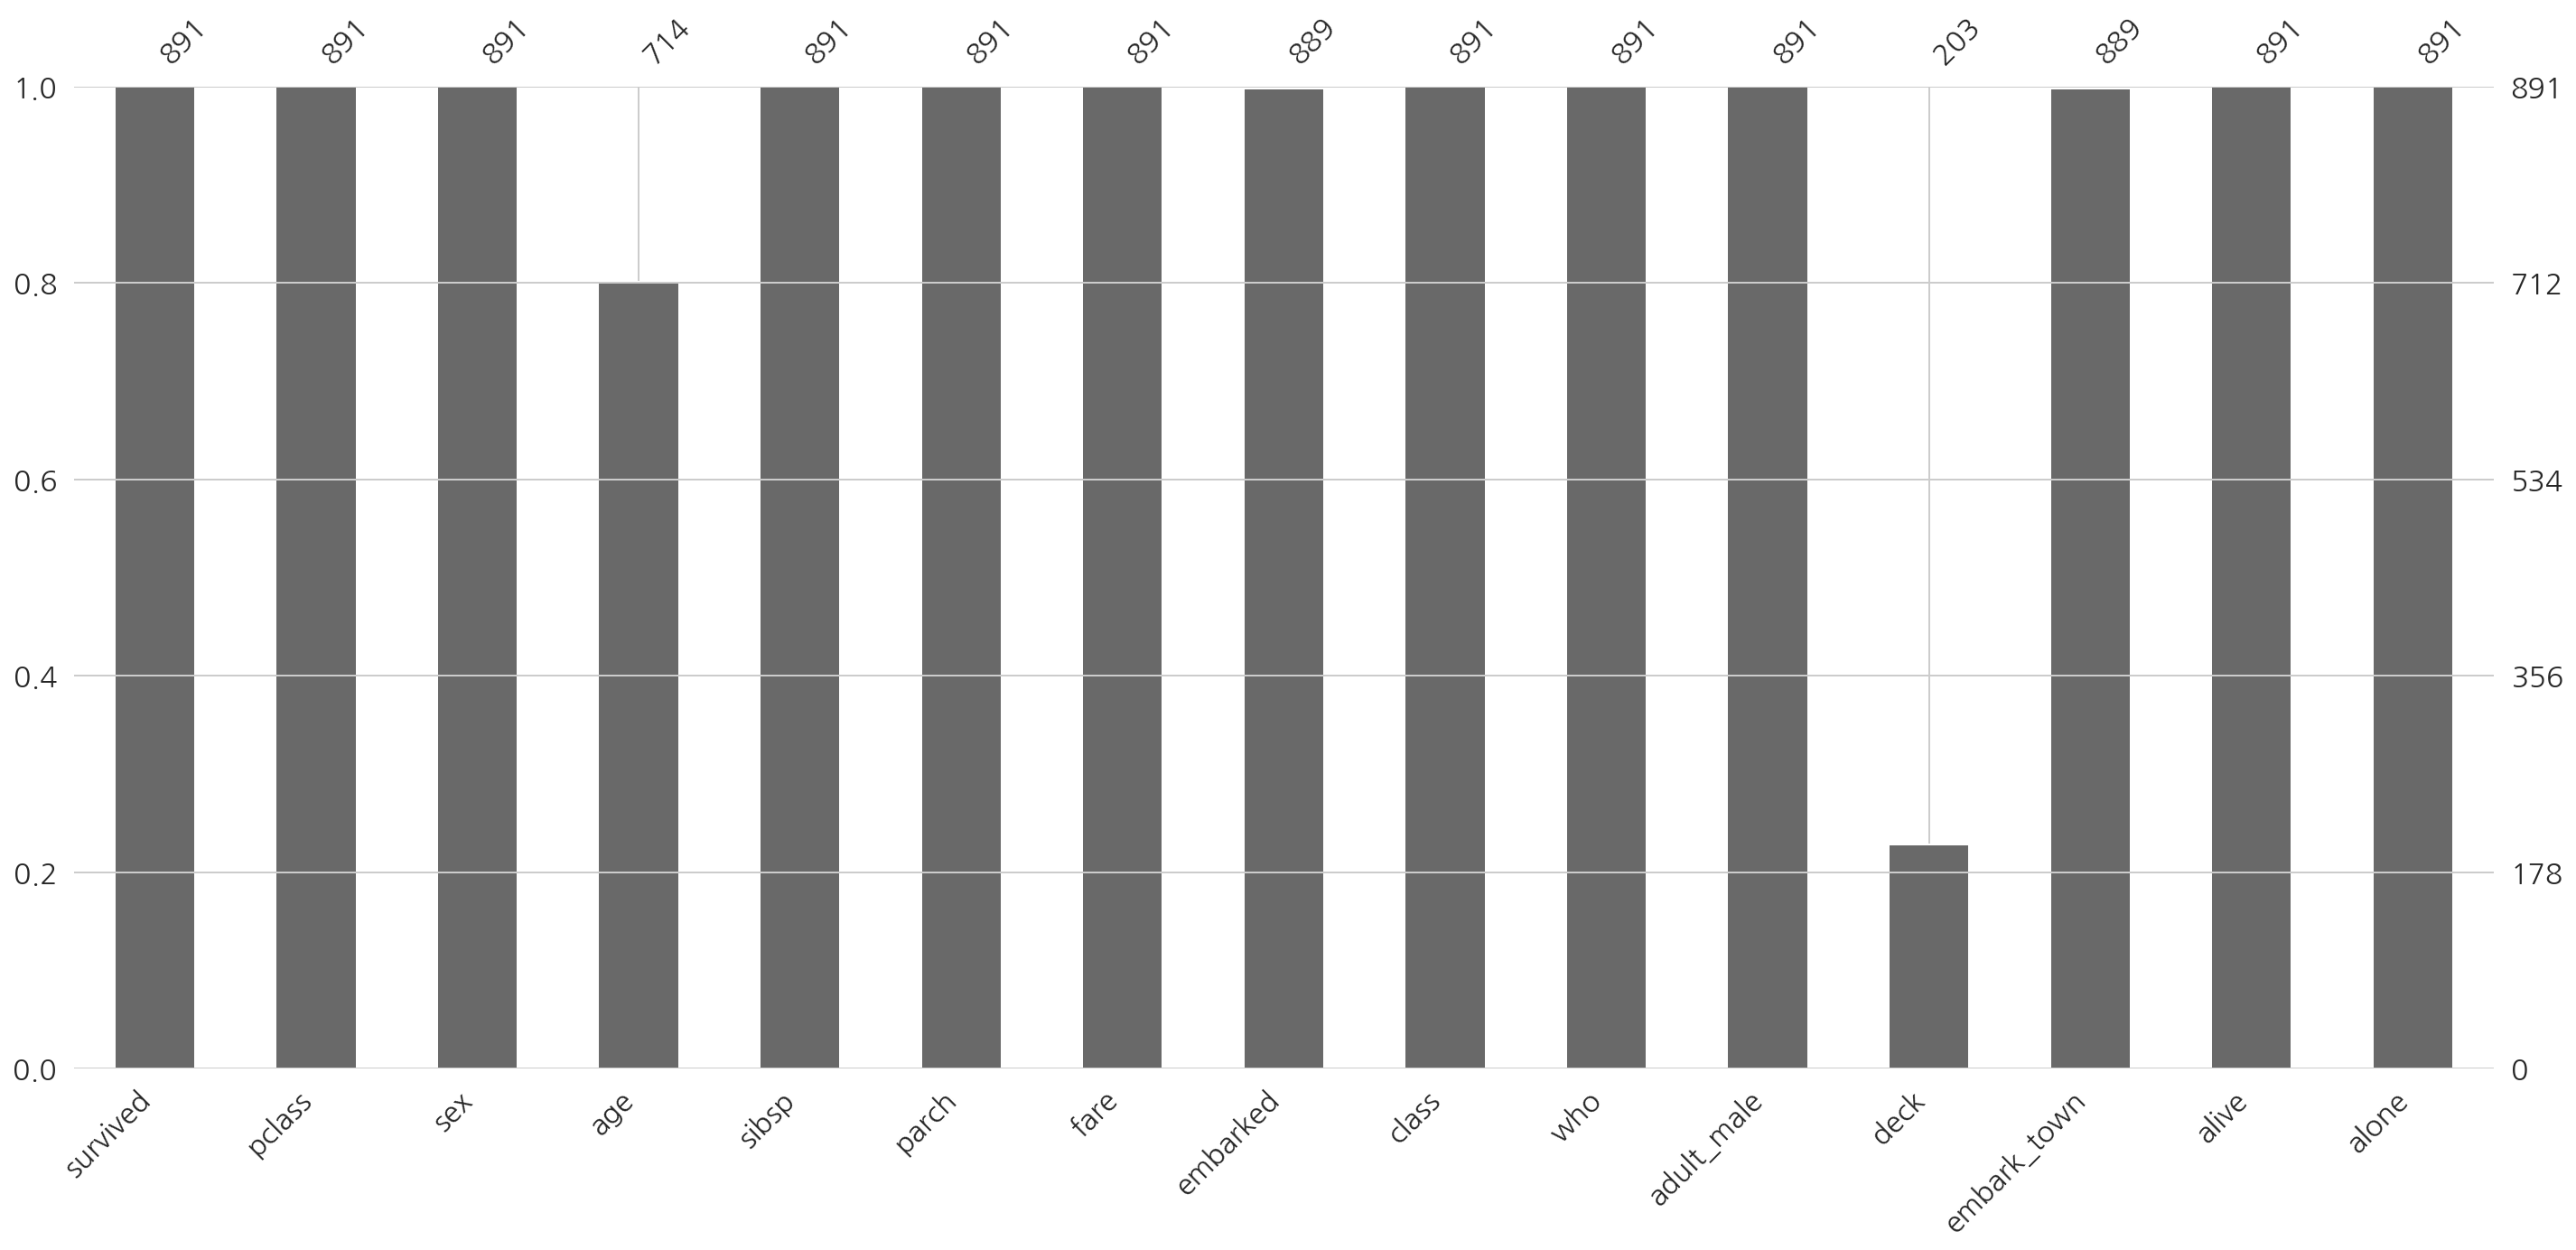

In [10]:
plt.figure(facecolor="1.")
msno.bar(titanic)
plt.show()

In [19]:
df

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,3.0,2019-01-03,C
3,<NA>,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
5,<NA>,NaN,NaN,2019-01-06,C
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


In [31]:
df.dropna()

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
4,5,0.5,5.0,2019-01-05,B
7,8,0.8,8.0,2019-01-08,B


In [32]:
# axis : 1 = 열 기준 삭제, 0(default) : 행 기준 삭제
# thresh : 비결측 데이터의 최소 갯수
df.dropna(thresh = 7, axis=1)

,x1,x4,x5
0,1,2019-01-01,A
1,2,2019-01-02,B
2,3,2019-01-03,C
3,<NA>,2019-01-04,A
4,5,2019-01-05,B
5,<NA>,2019-01-06,C
6,7,NaT,A
7,8,2019-01-08,B
8,9,2019-01-09,C


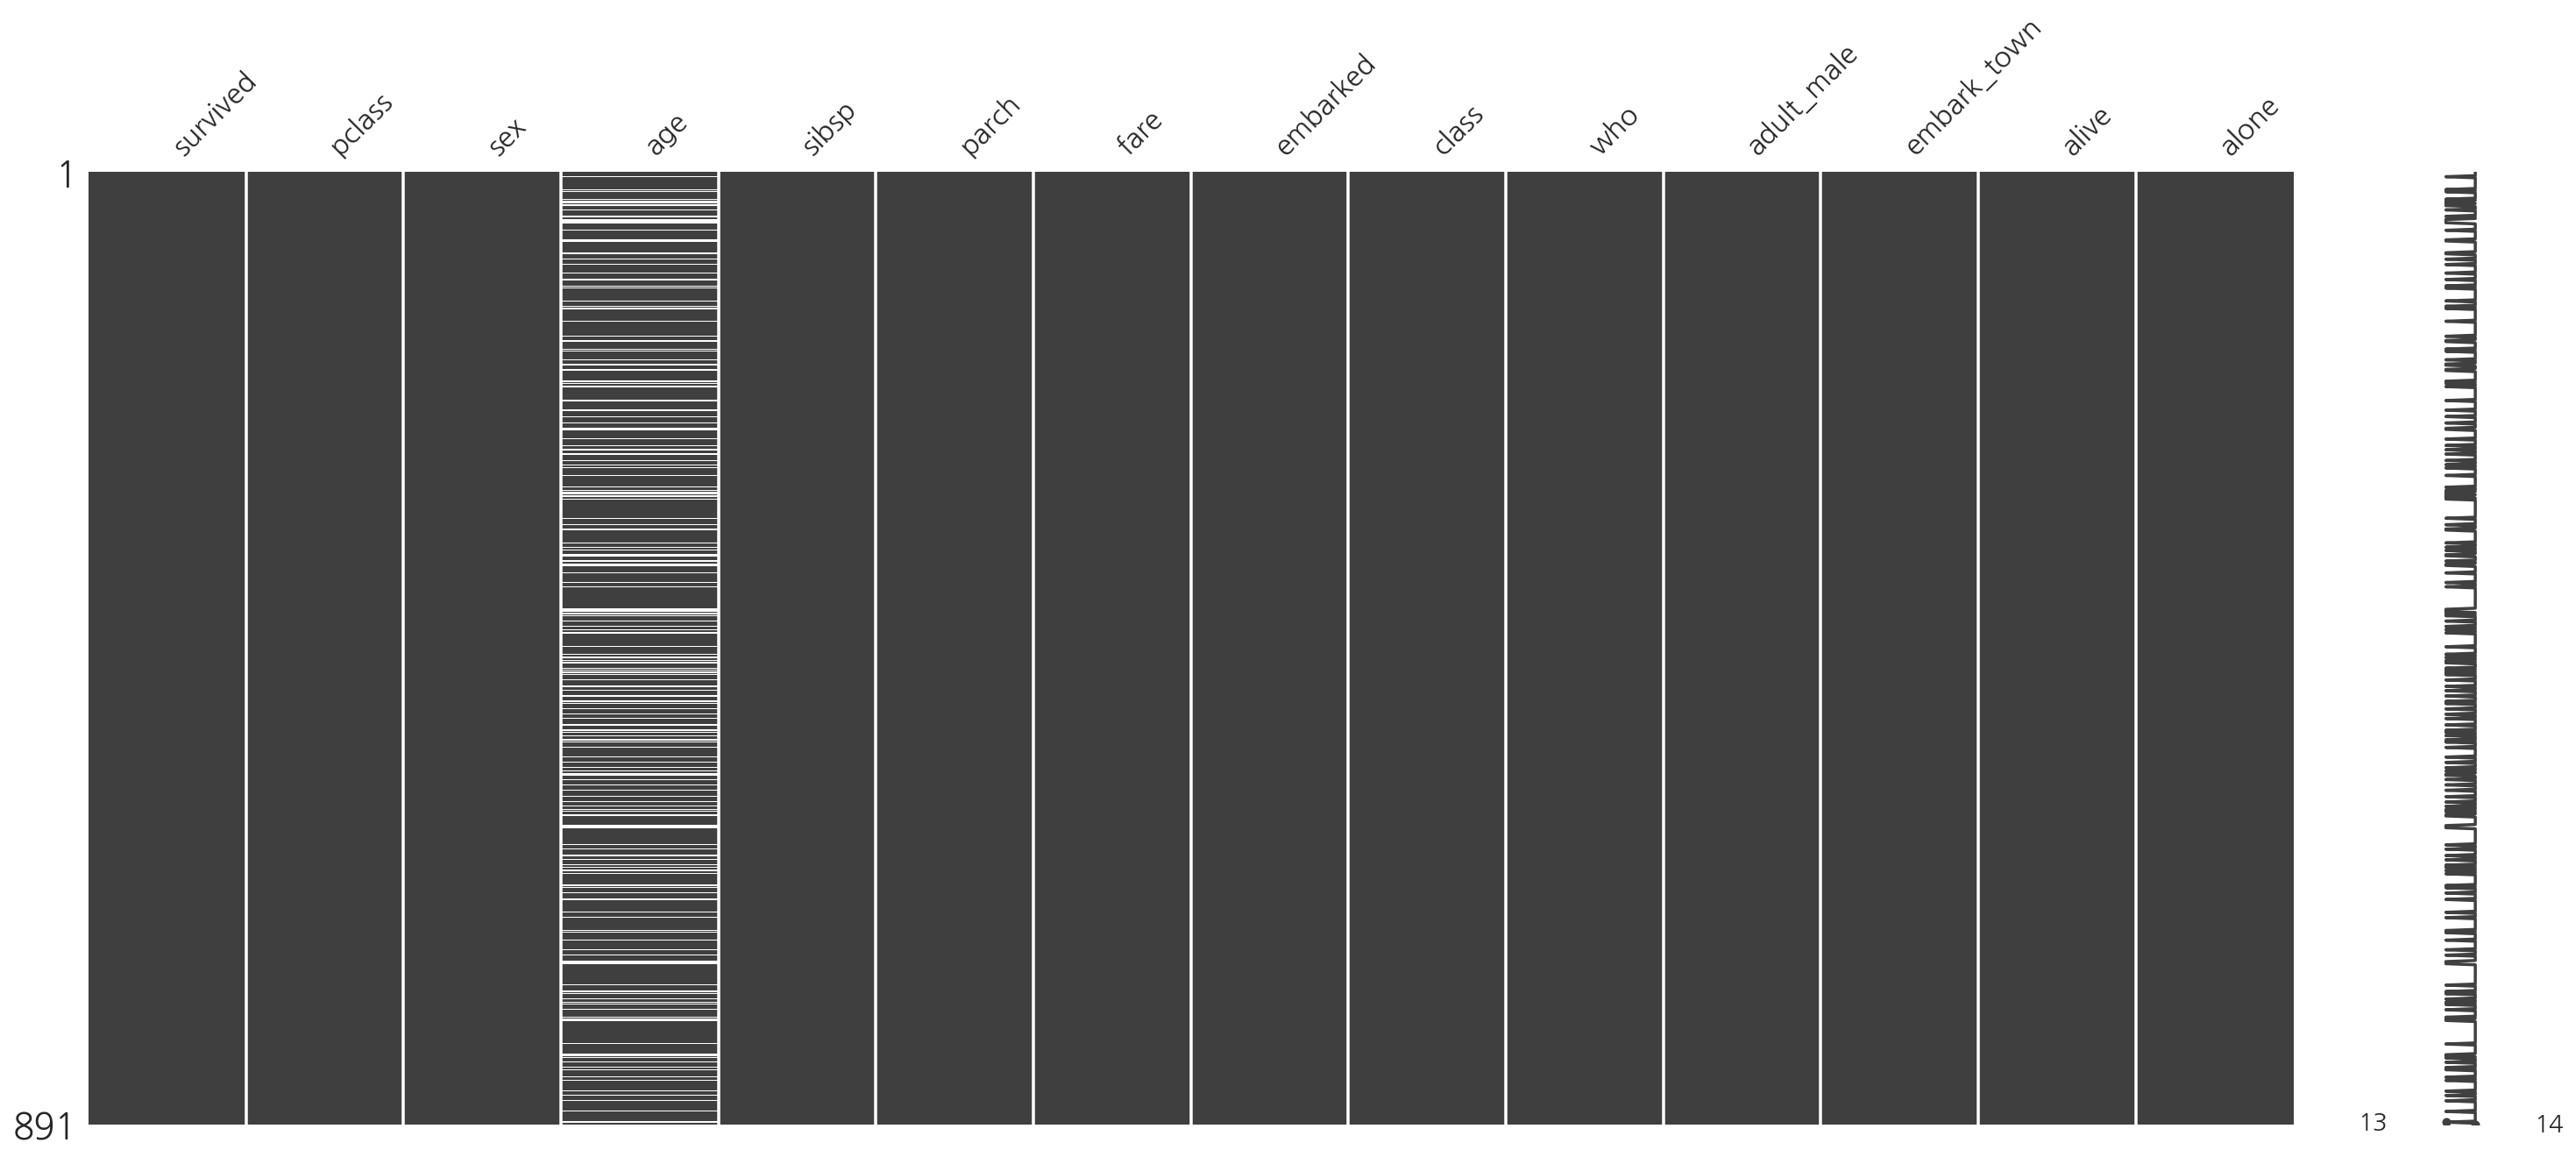

In [46]:
# 데이터가 절반 이상이 없는 열을 삭제
titanic = titanic.dropna(thresh=int(len(titanic) * 0.5), axis=1)
# plt.figure(facecolor="1.")
msno.matrix(titanic)
plt.show()

#### SimpleImputer
- SimpleImputer 클래스 객체 생성
    - strategy 인수 : mean = 평균값, median = 중앙값, most_frequent = 최빈값을 대체값으로 사용
- fit_transform 메서드로 대체값 대신 채워진 데이터 프레임 생성

In [33]:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df

AttributeError: 'bool' object has no attribute 'transpose'

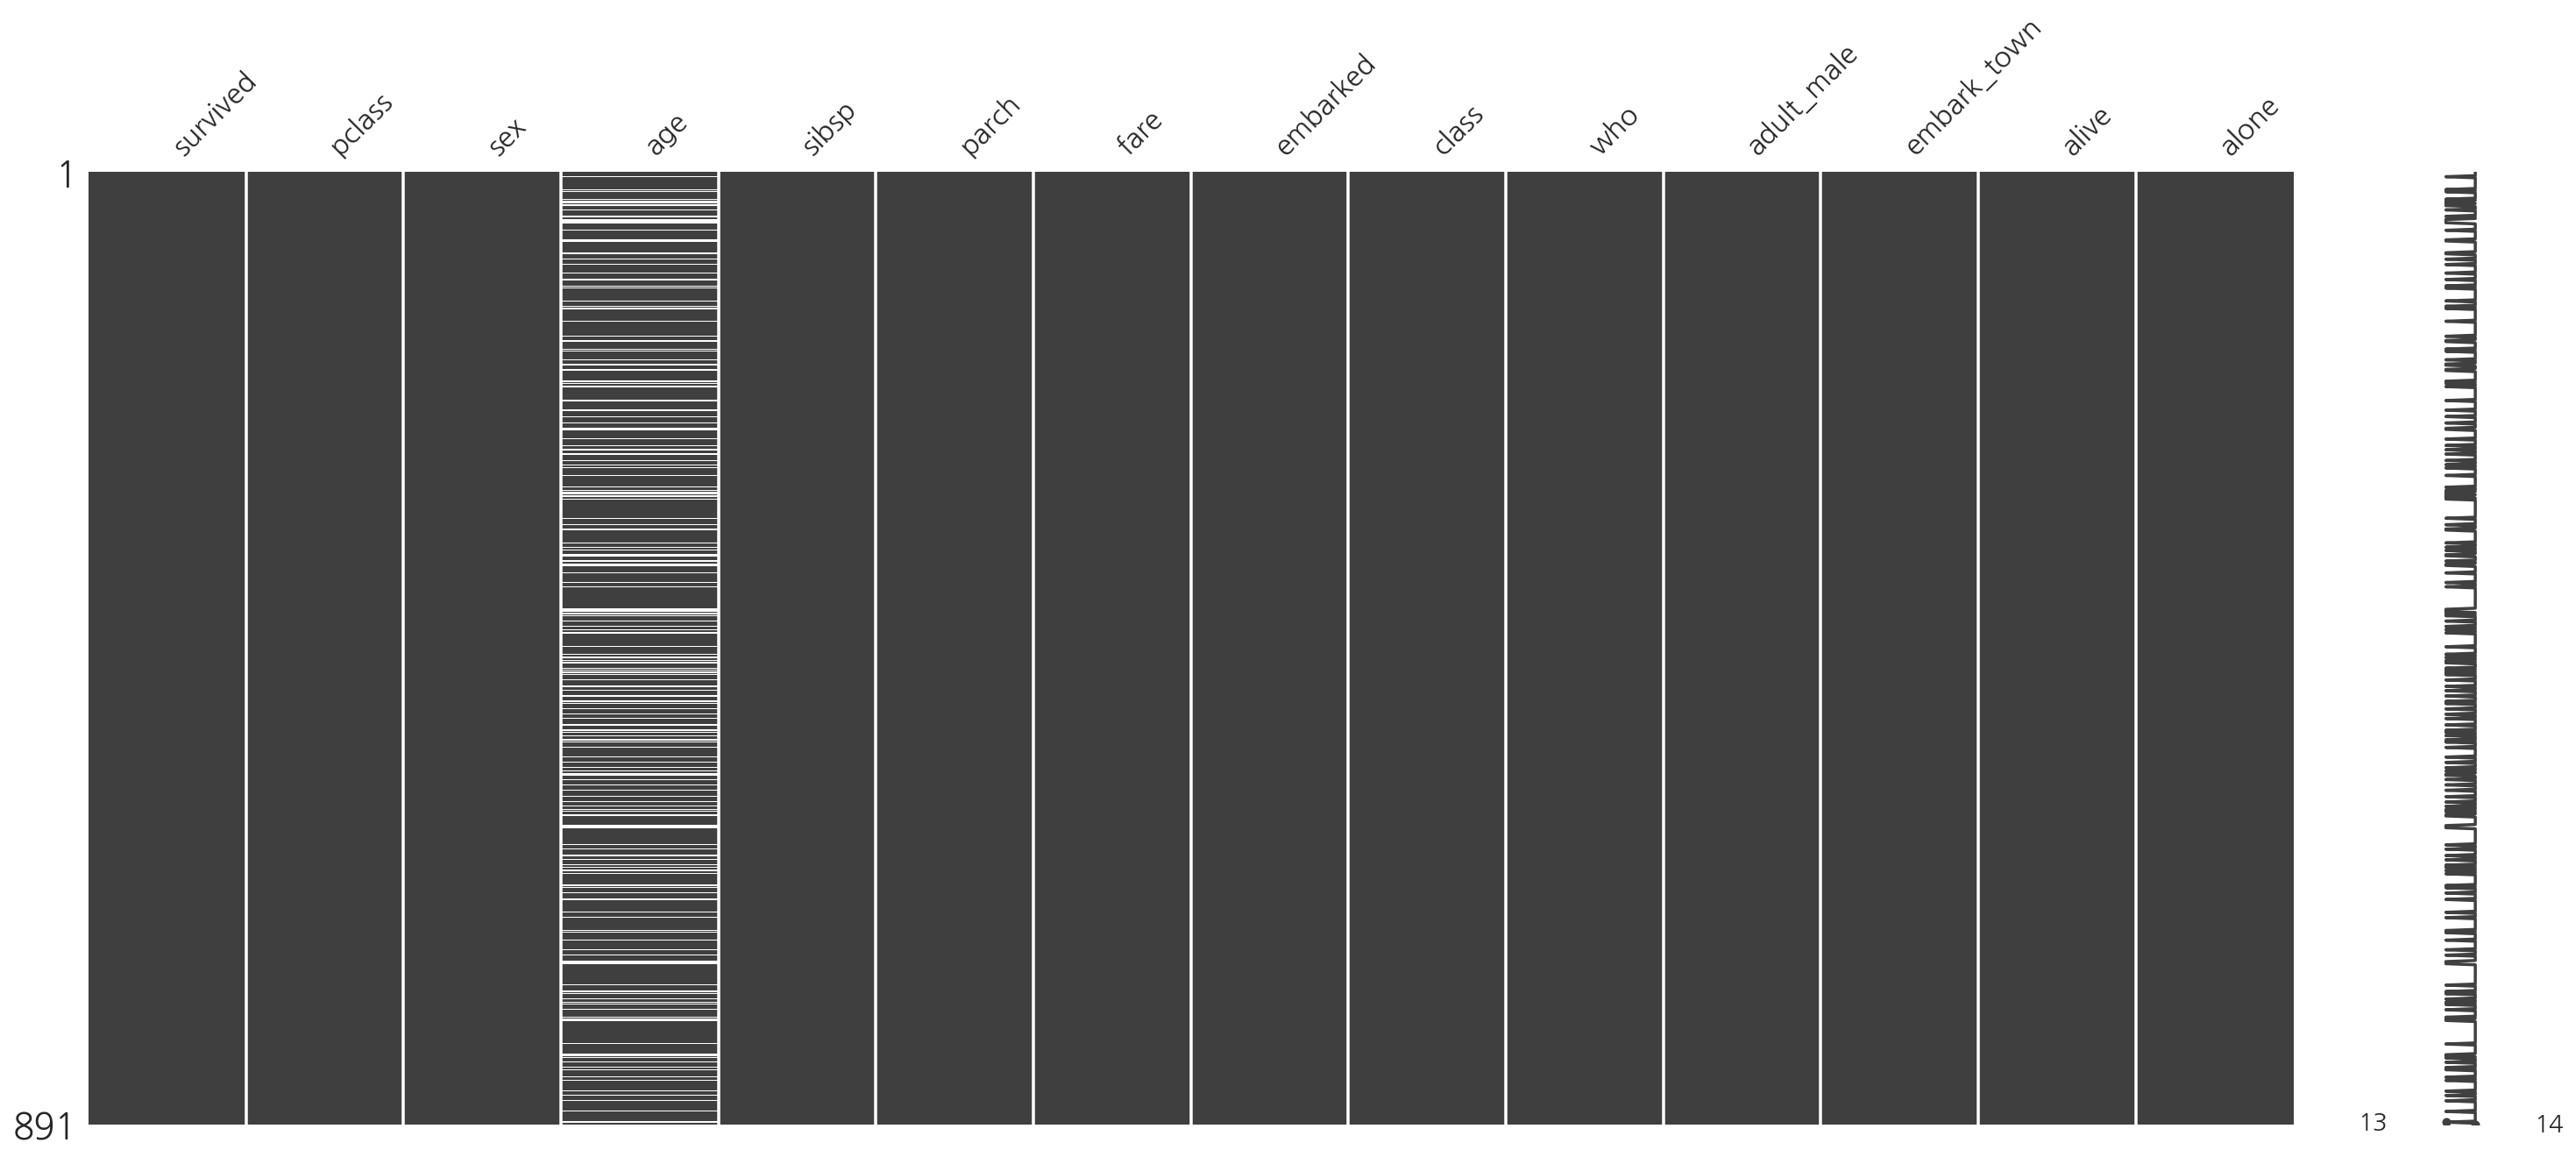

In [45]:
from sklearn.impute import SimpleImputer


imputer_embark_town = SimpleImputer(strategy="most_frequent")
titanic["embark_town"] = imputer_embark_town.fit_transform(titanic[["embark_town"]])
titanic["embarked"] = imputer_embark_town.fit_transform(titanic[["embarked"]])
#plt.figure(facecolor="1.")
msno.matrix(titanic)
plt.show()

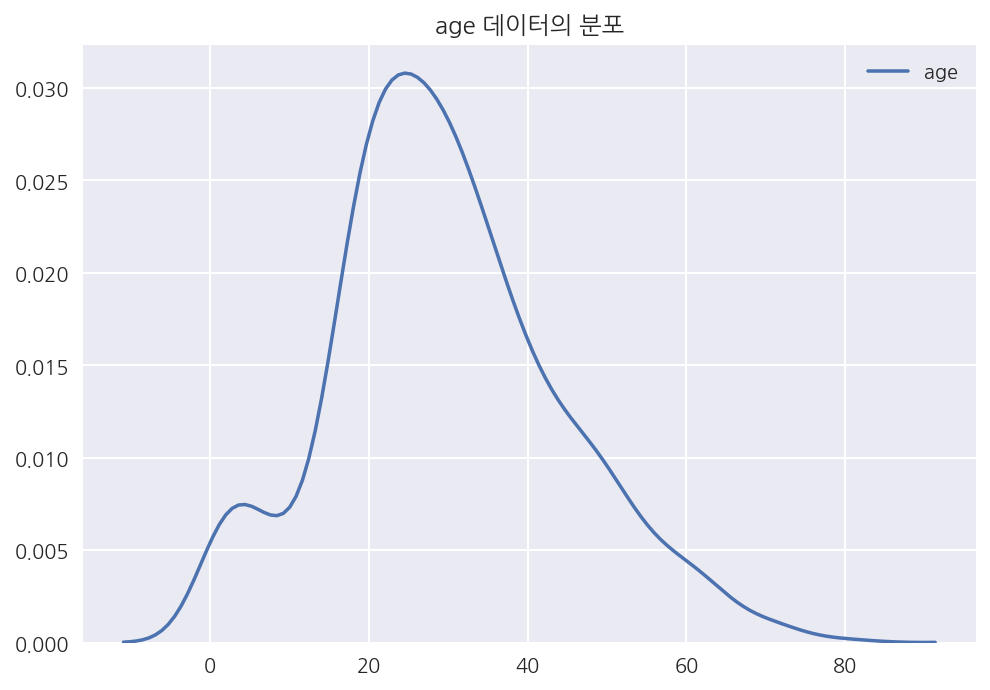

In [44]:
# plt.figure(facecolor="1.")
sns.kdeplot(titanic.age)
plt.title("age 데이터의 분포")
plt.show()

In [43]:
from matplotlib import rc

plt.style.use('seaborn')
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

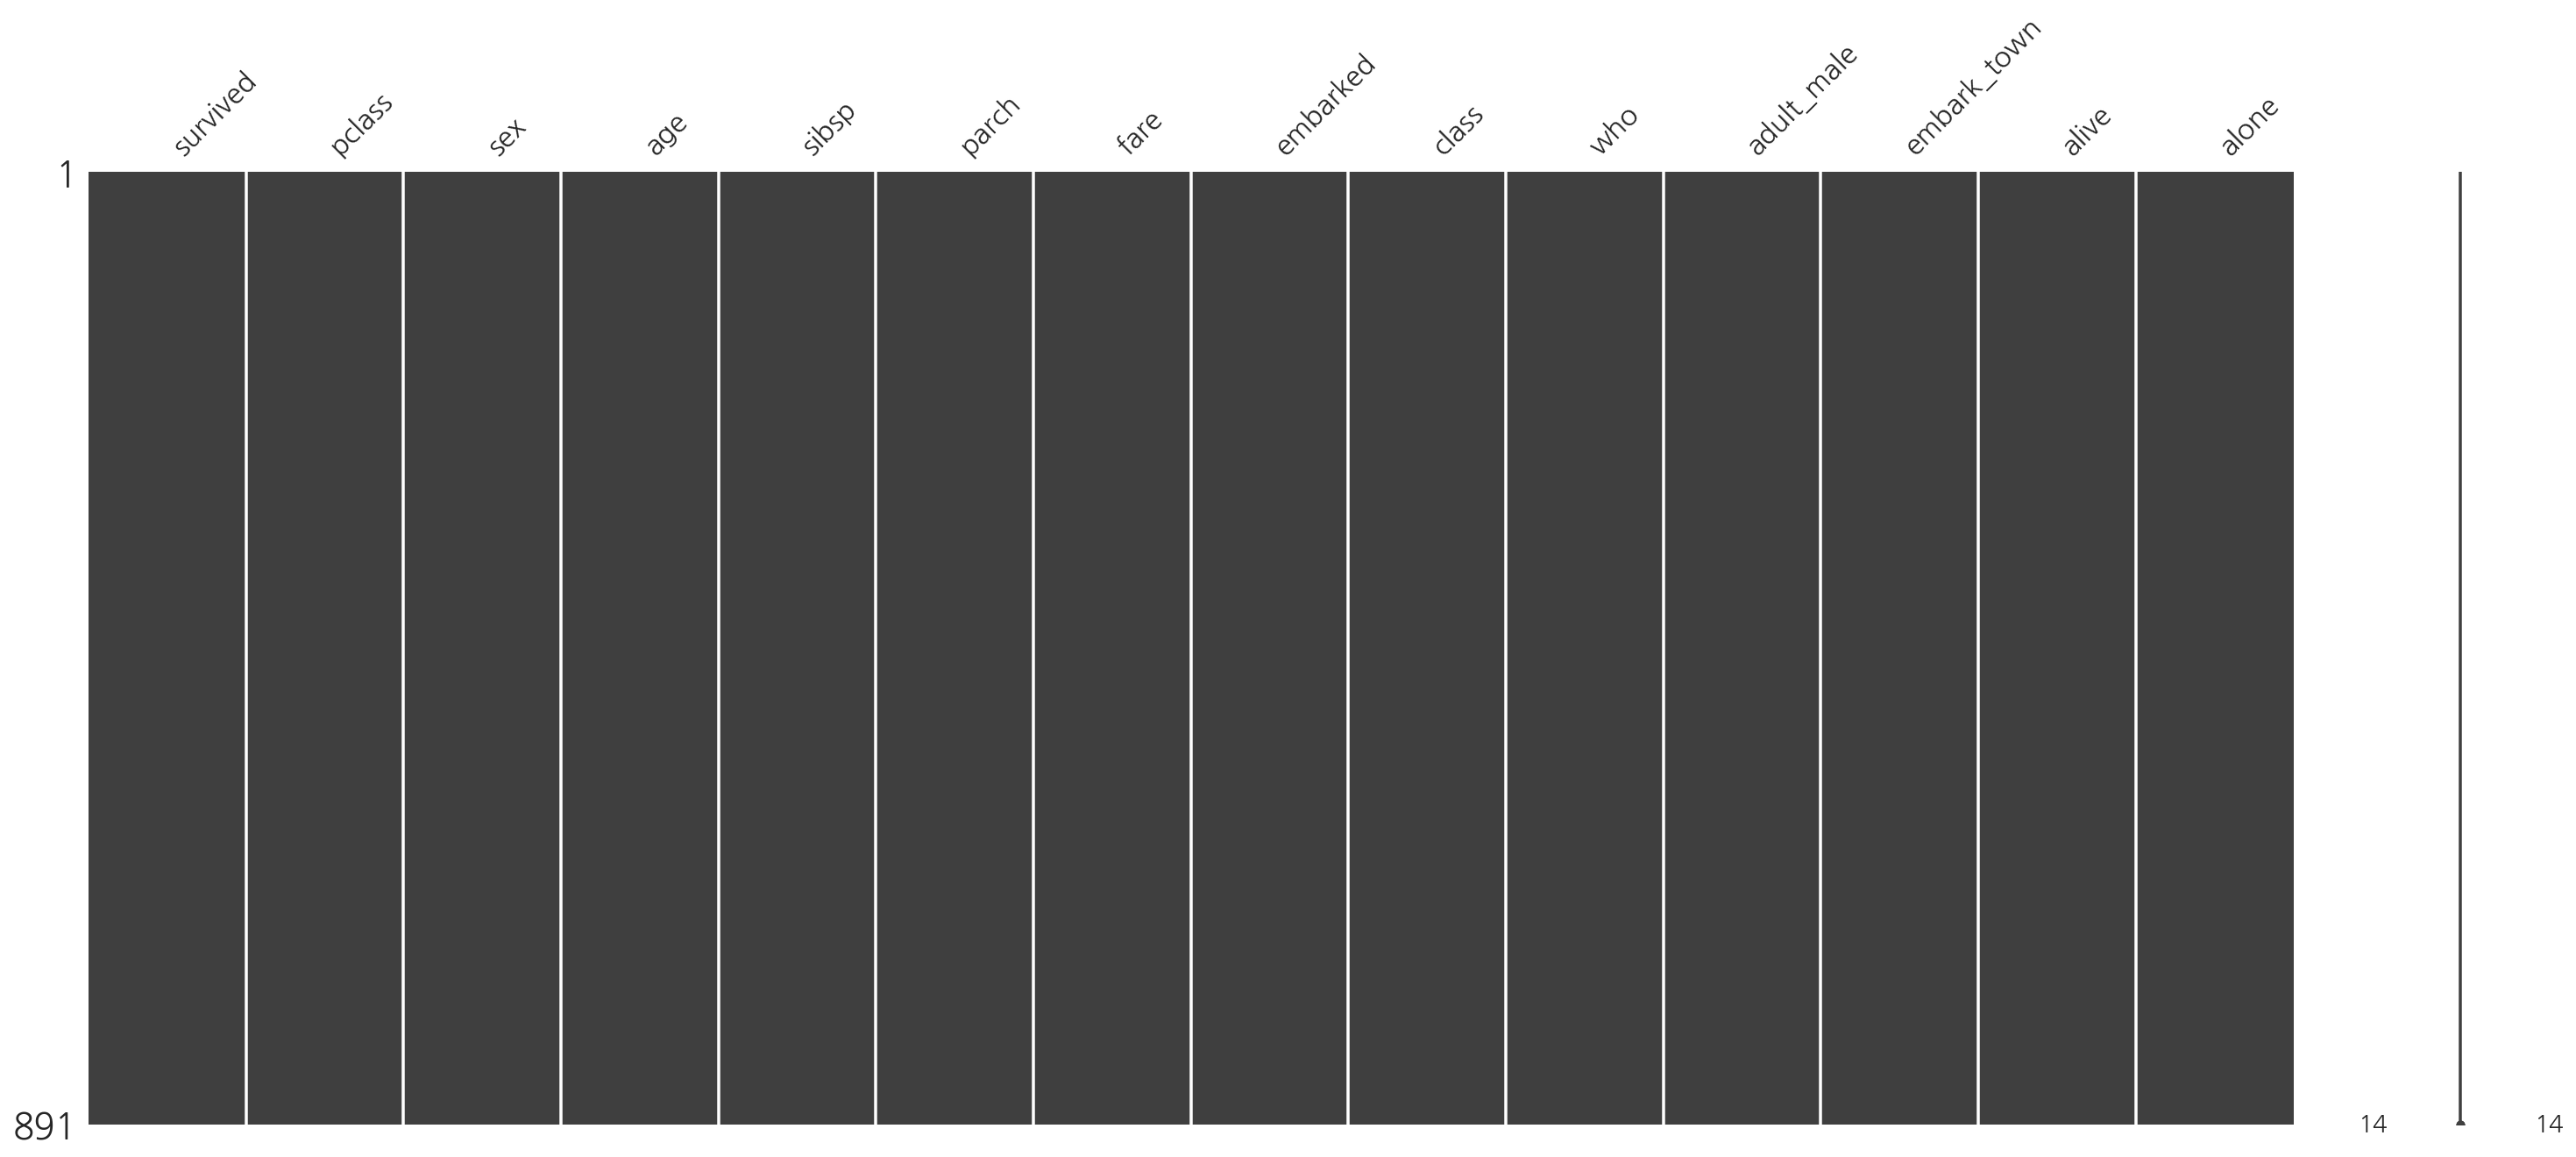

In [47]:
imputer_age = SimpleImputer(strategy="median")
titanic["age"] = imputer_embark_town.fit_transform(titanic[["age"]])

msno.matrix(titanic)
plt.show()

In [48]:
from patsy import demo_data

df = pd.DataFrame(demo_data("x1", "x2", "x3", "x4", "x5"))
df

,x1,x2,x3,x4,x5
0,1.764052,-0.977278,0.144044,0.333674,-2.552990
1,0.400157,0.950088,1.454274,1.494079,0.653619
2,0.978738,-0.151357,0.761038,-0.205158,0.864436
3,2.240893,-0.103219,0.121675,0.313068,-0.742165
4,1.867558,0.410599,0.443863,-0.854096,2.269755


In [52]:
from patsy import dmatrix 

dmatrix("x1 + 0", data=df)

DesignMatrix with shape (5, 1)
       x1
  1.76405
  0.40016
  0.97874
  2.24089
  1.86756
  Terms:
    'x1' (column 0)

In [53]:
# + 0, - 1 은 1로 구성된 상수항을 넣지 말라는 뜻
# 추후 회귀분석 시 상수항 반드시 존재 해야함 -> 보통은 + 0은 해주지 않음
dmatrix("x1 + x2 + x3 + 0", data=df)

DesignMatrix with shape (5, 3)
       x1        x2       x3
  1.76405  -0.97728  0.14404
  0.40016   0.95009  1.45427
  0.97874  -0.15136  0.76104
  2.24089  -0.10322  0.12168
  1.86756   0.41060  0.44386
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x3' (column 2)

In [54]:
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [56]:
dmatrix('survived + pclass + age', data = titanic)

DesignMatrix with shape (714, 4)
  Intercept  survived  pclass  age
          1         0       3   22
          1         1       1   38
          1         1       3   26
          1         1       1   35
          1         0       3   35
          1         0       1   54
          1         0       3    2
          1         1       3   27
          1         1       2   14
          1         1       3    4
          1         1       1   58
          1         0       3   20
          1         0       3   39
          1         0       3   14
          1         1       2   55
          1         0       3    2
          1         0       3   31
          1         0       2   35
          1         1       2   34
          1         1       3   15
          1         1       1   28
          1         0       3    8
          1         1       3   38
          1         0       1   19
          1         0       1   40
          1         0       2   66
          1         0 

In [57]:
# 데이터 변형
dmatrix("x1 + np.log(np.abs(x2))", df)

DesignMatrix with shape (5, 3)
  Intercept       x1  np.log(np.abs(x2))
          1  1.76405            -0.02298
          1  0.40016            -0.05120
          1  0.97874            -1.88811
          1  2.24089            -2.27090
          1  1.86756            -0.89014
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'np.log(np.abs(x2))' (column 2)

In [58]:
# 함수도 가능
def ten_times(x):
    return 10 * x

dmatrix("ten_times(x1)", df)

DesignMatrix with shape (5, 2)
  Intercept  ten_times(x1)
          1       17.64052
          1        4.00157
          1        9.78738
          1       22.40893
          1       18.67558
  Terms:
    'Intercept' (column 0)
    'ten_times(x1)' (column 1)

In [59]:
dmatrix("x1 + x2 + x1:x2 + 0", df)

DesignMatrix with shape (5, 3)
       x1        x2     x1:x2
  1.76405  -0.97728  -1.72397
  0.40016   0.95009   0.38018
  0.97874  -0.15136  -0.14814
  2.24089  -0.10322  -0.23130
  1.86756   0.41060   0.76682
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x1:x2' (column 2)

In [60]:
dmatrix("x1 * x2 + 0", df)

DesignMatrix with shape (5, 3)
       x1        x2     x1:x2
  1.76405  -0.97728  -1.72397
  0.40016   0.95009   0.38018
  0.97874  -0.15136  -0.14814
  2.24089  -0.10322  -0.23130
  1.86756   0.41060   0.76682
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x1:x2' (column 2)

In [61]:
# x1 데이터에서 x1의 평균을 뺀 것과 같은 결과
dm = dmatrix("center(x1) + 0", df)
dm

DesignMatrix with shape (5, 1)
  center(x1)
     0.31377
    -1.05012
    -0.47154
     0.79061
     0.41728
  Terms:
    'center(x1)' (column 0)

In [62]:
# 평균값은 design_info 속성 내부에 저장
dm.design_info.factor_infos

{EvalFactor('center(x1)'): FactorInfo(factor=EvalFactor('center(x1)'),
            type='numerical',
            state=<factor state>,
            num_columns=1)}